# Fraud Detection using Classification


In [ ]:
import numpy as np
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df=pd.read_csv('C:\\Users\\vasala harinadha\\OneDrive\\Desktop\\Fraud.csv' , header=0) # importing data 


In [89]:
df.head()   #this will give us the sample data from dataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# EDD analysis
This is Extended data dictionary

This is used for univariate anaylsis that means analysis of songle variable

In this we have count, mean, median, mode, max, min values this is used to describe the data

In [90]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


## Attribute Information:

- step:            unit of time in the dataset (e.g., hours)
- type:            type of transaction (e.g., PAYMENT, TRANSFER, CASH_OUT, etc.)
- amount:          amount of the transaction
- nameOrig:        ID of the account initiating the transaction
- oldbalanceOrg:   initial balance before the transaction in the originating account
- newbalanceOrig:  new balance after the transaction in the originating account
- nameDest:        ID of the account receiving the transaction
- oldbalanceDest:  initial balance before the transaction in the destination account
- newbalanceDest:  new balance after the transaction in the destination account
- isFraud:         1 if the transaction is fraudulent, 0 otherwise
- isFlaggedFraud:  1 if the transaction is flagged as fraudulent by the system, 0 otherwise


In [91]:
unique_values = df['isFlaggedFraud'].unique()
unique_values


array([0], dtype=int64)

In [92]:
del df['isFlaggedFraud']

In [93]:
# Calculate the number of missing values in each column of the DataFrame.
missing_values = df.isnull().sum()

# Print the missing value counts for each column.
print("Missing values in each column:")
print(missing_values)

# This removes any rows that have at least one NaN (missing value) from the dataset.
df_cleaned = df.dropna()

Missing values in each column:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


## Missing values imputation


if the varaibe is numeric and has missing values then we use mean, medain or mode to impute missing values.

if the variable is categorical then we impute missing values with "unknown" such that it will also contribute.

we use this missing value imputation if there are missing values in the variables.

since there are no missing values in the data no need to do missing value imputation.



## Dummy vriable creation
The ML model doesn't understand the categorical data so we have to convert that data into numeric i.e., (1,0) or (True, False).

If the data have n categories then we have n-1 dummy variables.

We use getdummies method from pandas to create dummy variables easily.

since there is no categorical data in this there is no need to create dummy variables.

## Outliers Treatment
Outliers are data points that differ significantly from other observations in a dataset.

They can be unusually high or low values compared to the rest.

Treating outliers is important because they can distort statistical analyses, affect model accuracy, and lead to incorrect 
conclusions if left unaddressed.

# Visualizations

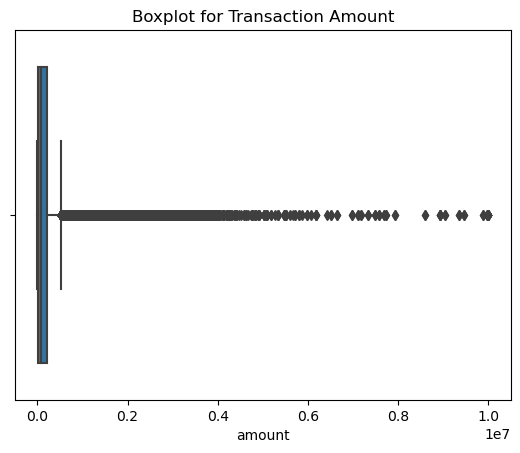

In [95]:

sns.boxplot(x=df['amount'])
plt.title("Boxplot for Transaction Amount")
plt.show()


In [96]:
from scipy.stats import zscore

numerical_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig']
z_scores = df[numerical_columns].apply(zscore)

outliers = (z_scores.abs() > 3).any(axis=1)
df_no_outliers = df[~outliers]
print(f"Rows removed due to outliers: {outliers.sum()}")


Rows removed due to outliers: 45823


## Outlier Detection: 
This method uses z-scores to identify and remove extreme values that deviate significantly from the mean,
helping to clean the dataset and ensure more reliable analysis.

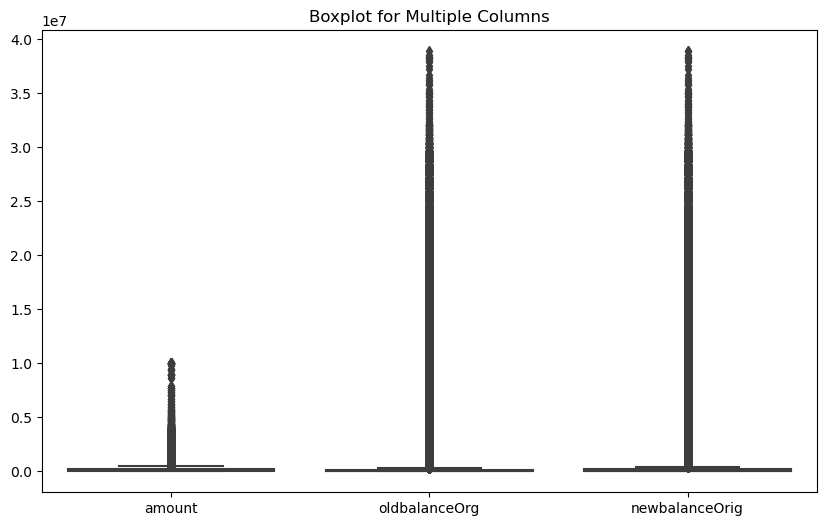

In [97]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['amount', 'oldbalanceOrg', 'newbalanceOrig']])
plt.title("Boxplot for Multiple Columns")
plt.show()

C:\Users\vasala harinadha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


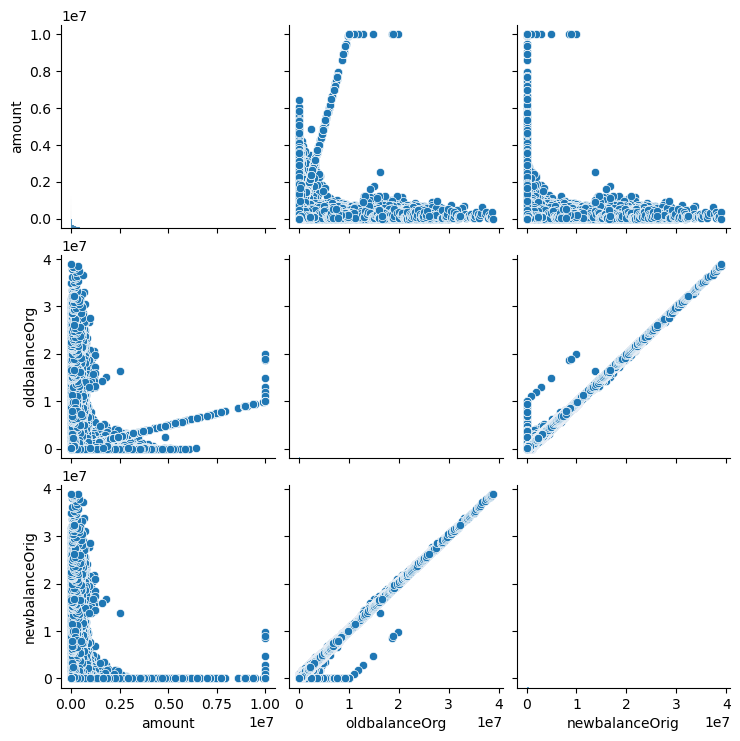

In [10]:
sns.pairplot(df[['amount', 'oldbalanceOrg', 'newbalanceOrig']])
plt.show()


# Converting the  other columns to numeric

In [98]:
# Extract numeric part from nameOrig and nameDest
df['nameOrig'] = df['nameOrig'].str.extract('(\d+)').astype(float)
df['nameDest'] = df['nameDest'].str.extract('(\d+)').astype(float)

# Convert other columns to numeric
df['step'] = pd.to_numeric(df['step'], errors='coerce')
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')
df['oldbalanceOrg'] = pd.to_numeric(df['oldbalanceOrg'], errors='coerce')
df['newbalanceOrig'] = pd.to_numeric(df['newbalanceOrig'], errors='coerce')
df['oldbalanceDest'] = pd.to_numeric(df['oldbalanceDest'], errors='coerce')
df['newbalanceDest'] = pd.to_numeric(df['newbalanceDest'], errors='coerce')
df['isFraud'] = pd.to_numeric(df['isFraud'], errors='coerce')

# Verify data types
print(df.dtypes)


step                int64
type               object
amount            float64
nameOrig          float64
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object


In [99]:
# Convert specific columns from float to int
df['step'] = df['step'].astype(int)
df['amount'] = df['amount'].astype(int)
df['oldbalanceOrg'] = df['oldbalanceOrg'].astype(int)
df['newbalanceOrig'] = df['newbalanceOrig'].astype(int)
df['oldbalanceDest'] = df['oldbalanceDest'].astype(int)
df['newbalanceDest'] = df['newbalanceDest'].astype(int)


In [100]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839,1.231007e+09,170136,160296,1.979787e+09,0,0,0
1,1,PAYMENT,1864,1.666544e+09,21249,19384,2.044282e+09,0,0,0
2,1,TRANSFER,181,1.305486e+09,181,0,5.532641e+08,0,0,1
3,1,CASH_OUT,181,8.400837e+08,181,0,3.899701e+07,21182,0,1
4,1,PAYMENT,11668,2.048538e+09,41554,29885,1.230702e+09,0,0,0


In [101]:
df = pd.get_dummies(data=df, columns=['type'])
# This code performs one-hot encoding on the 'type' column, creating separate binary columns for each unique category in 'type'.

In [102]:
df = df.astype({'type_CASH_IN': 'int', 'type_CASH_OUT': 'int', 
                'type_DEBIT': 'int', 'type_PAYMENT': 'int', 'type_TRANSFER': 'int', 
                'isFraud': 'int'})

df[df.select_dtypes(include=['bool']).columns] = df.select_dtypes(include=['bool']).astype(int)




# Correlation matrix
 This correlation matrix is for bi-variate analysis
 
 this will tell us if the two variables moving together or not
 
 Here we have correlation coefficient in between 2 variables
 
 if coefficient value is close to +1 or -1 then we can say we have a +ve or -ve correlation
 
 if the coefficient value is close to zero then we can say we have no correlation

In [103]:
correlation_matrix=df.corr()
correlation_matrix

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
step,1.000000,-0.025996,0.000089,-0.006780,-0.007180,-0.003636,-0.002251,-0.019503,0.045030,-0.005376,-0.013746,-0.005992,0.017102,0.004375
amount,-0.025996,1.000000,0.000608,0.004864,-0.001133,-0.001839,0.215558,0.311936,0.128862,0.022341,0.071255,-0.047878,-0.397464,0.539278
nameOrig,0.000089,0.000608,1.000000,-0.002147,-0.002136,-0.001714,-0.000036,0.000073,-0.001480,-0.000680,0.001487,-0.001293,-0.001376,0.001180
oldbalanceOrg,-0.006780,0.004864,-0.002147,1.000000,0.999047,-0.000603,0.093305,0.064049,0.003829,0.510853,-0.204549,-0.022109,-0.186253,-0.081976
newbalanceOrig,-0.007180,-0.001133,-0.002136,0.999047,1.000000,-0.000636,0.095182,0.063725,-0.009438,0.530887,-0.214548,-0.022489,-0.190113,-0.087814
nameDest,-0.003636,-0.001839,-0.001714,-0.000603,-0.000636,1.000000,0.001511,0.001534,-0.001369,-0.001648,-0.000605,0.000265,0.002707,-0.001210
oldbalanceDest,-0.002251,0.215558,-0.000036,0.093305,0.095182,0.001511,1.000000,0.978403,-0.007552,0.108309,0.130120,0.010704,-0.303959,0.130362
newbalanceDest,-0.019503,0.311936,0.000073,0.064049,0.063725,0.001534,0.978403,1.000000,-0.000495,0.057775,0.160136,0.007813,-0.329066,0.197706
isFraud,0.045030,0.128862,-0.001480,0.003829,-0.009438,-0.001369,-0.007552,-0.000495,1.000000,-0.017363,0.010328,-0.002741,-0.023566,0.049279
type_CASH_IN,-0.005376,0.022341,-0.000680,0.510853,0.530887,-0.001648,0.108309,0.057775,-0.017363,1.000000,-0.391241,-0.043656,-0.375295,-0.157922


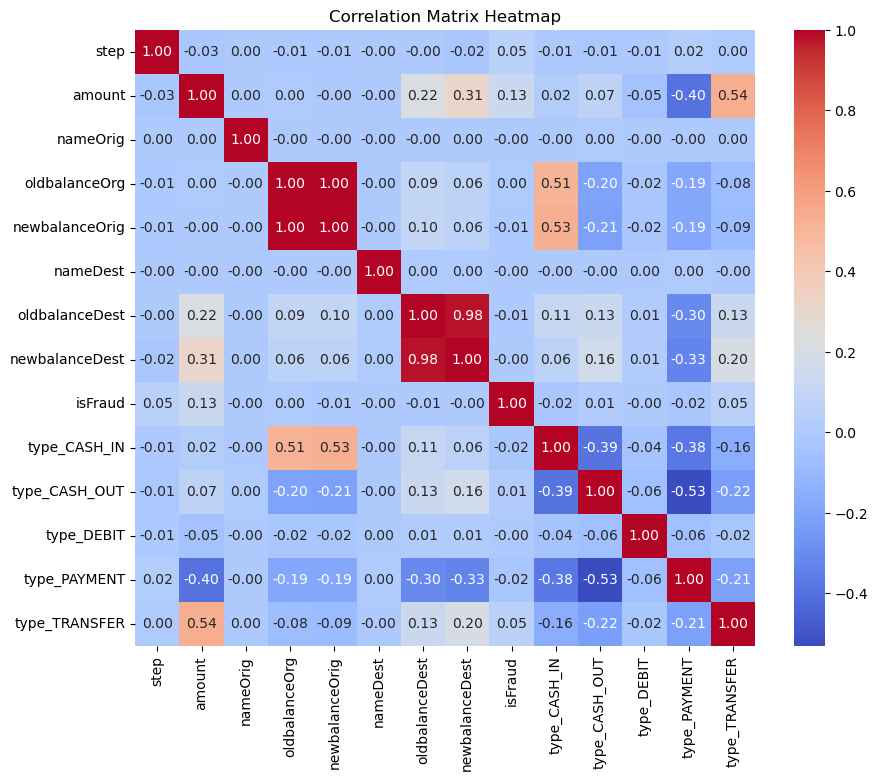

In [104]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [105]:
threshold = 0.9

correlation_matrix = df.corr()
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_pairs.append((colname, correlation_matrix.columns[j]))

print(highly_correlated_pairs)

df_reduced = df.drop(columns=['oldbalanceOrg'])


[('newbalanceOrig', 'oldbalanceOrg'), ('newbalanceDest', 'oldbalanceDest')]


- From the above analysis the newbalanceOrig and oldbalanceOrig are more close to 1 they are more contributing in our data much
- As per my research newbalanceOrig is very important so i dont want to remove it iam removing fbs from data

In [106]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

boolean_cols = ['isFraud']
df[boolean_cols] = df[boolean_cols].astype(int)

if 'type' in df.columns:
    df = pd.get_dummies(df, columns=['type'], drop_first=True)

scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print(df.head())



   step    amount      nameOrig  oldbalanceOrg  newbalanceOrig      nameDest  \
0   0.0  0.000984  1.231007e+09       0.004374        0.004121  1.979787e+09   
1   0.0  0.000186  1.666544e+09       0.000546        0.000498  2.044282e+09   
2   0.0  0.000018  1.305486e+09       0.000005        0.000000  5.532641e+08   
3   0.0  0.000018  8.400837e+08       0.000005        0.000000  3.899701e+07   
4   0.0  0.001167  2.048538e+09       0.001068        0.000768  1.230702e+09   

   oldbalanceDest  newbalanceDest  isFraud  type_CASH_IN  type_CASH_OUT  \
0        0.000000             0.0        0             0              0   
1        0.000000             0.0        0             0              0   
2        0.000000             0.0        1             0              0   
3        0.000503             0.0        1             0              1   
4        0.000000             0.0        0             0              0   

   type_DEBIT  type_PAYMENT  type_TRANSFER  
0           0          

## Normalizing the data
Normalization is the process of adjusting the values of numerical features in a dataset to a common scale, without distorting differences in the ranges of values. This is typically done to make features comparable and improve the performance and convergence speed of machine learning algorithms.


In [107]:
X = df.drop('isFraud', axis=1)  #using drop i assigned the independent variable to X except the target variable
y = df['isFraud'] # i assigned the target variable to y

In [108]:
X.shape #this will give us the number of rows and columns

(1048575, 13)

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Train_Test_Split
- using this train test split we split the data into train data and test data
- The training set is used to train the model, while the test set is used to evaluate the model's performance on new data.

In [111]:
X_train.shape,X_test.shape


((838860, 13), (209715, 13))

In [112]:
y_train.shape,y_test.shape


((838860,), (209715,))

In [113]:
X_train[:6]

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
104043,0.095745,0.003700,1.962916e+09,0.000000,0.000000,3.993389e+08,0.001448,0.010925,0,1,0,0,0
17338,0.074468,0.000777,8.100094e+08,0.001276,0.001076,1.015133e+09,0.000000,0.000000,0,0,0,1,0
424375,0.180851,0.001389,2.020851e+09,0.000000,0.000000,1.468235e+09,0.000000,0.000000,0,0,0,1,0
989925,0.468085,0.002440,7.091461e+08,0.002035,0.002663,7.344200e+08,0.014522,0.013909,1,0,0,0,0
937763,0.446809,0.013932,9.301503e+08,0.383033,0.388175,7.857056e+08,0.004625,0.000000,1,0,0,0,0
816433,0.414894,0.001093,8.864212e+08,0.001685,0.001404,1.319687e+09,0.000000,0.000000,0,0,0,1,0


# Building Predictive models
- Since this the classification problem iam using classifications models like logistic regression, lda, knn, decision trees

# 1) Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
lr=LogisticRegression()

In [116]:
lr.fit(X_train,y_train)

LogisticRegression()

In [117]:
print(lr.intercept_,lr.coef_)

[-9.54872745e-17] [[ 7.97369072e-18  1.38720320e-17 -5.61975455e-09 -9.26420673e-19
  -5.59430389e-18 -5.56454167e-09 -4.14193528e-18 -2.85523795e-18
  -5.39405786e-17 -1.27662569e-17 -1.71119755e-18 -8.27188380e-17
   5.56495966e-17]]


In [118]:
y_test_predict=lr.predict(X_test)

In [119]:
y_test_predict

array([0, 0, 0, ..., 0, 0, 0])

# Model performance
- confusion matrix :
  A confusion matrix is a table used to evaluate the performance of a classification model. It shows the counts of true positive, true negative, false    positive, and false negative predictions, providing a clear way to see how well the model is classifying each category.

  True Positive (TP): The model correctly predicted the positive class.
  True Negative (TN): The model correctly predicted the negative class.
  False Positive (FP): The model incorrectly predicted the positive class (also known as a "Type I error").
  False Negative (FN): The model incorrectly predicted the negative class (also known as a "Type II error").

  This matrix helps in calculating various performance metrics like accuracy, precision, recall, and F1 score.

- Precision score : Precision measures how many of the positive predictions made by the model were actually correct.
- Recall score : Recall (or Sensitivity) measures how many actual positive instances were correctly predicted by the model.
- F1 score : The F1 score is the harmonic mean of precision and recall, providing a balance between the two.
- Roc auc acore : The ROC AUC (Receiver Operating Characteristic Area Under the Curve) score measures the ability of the model to distinguish between classes.
- Accuracy measures the proportion of correctly predicted instances out of all instances.

In [120]:
y_train_predict=lr.predict(X_train)

In [121]:
y_train_predict

array([0, 0, 0, ..., 0, 0, 0])

In [122]:
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score,confusion_matrix,precision_score,roc_auc_score

print(classification_report(y_test,y_test_predict))

C:\Users\vasala harinadha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vasala harinadha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209474
           1       0.00      0.00      0.00       241

    accuracy                           1.00    209715
   macro avg       0.50      0.50      0.50    209715
weighted avg       1.00      1.00      1.00    209715



C:\Users\vasala harinadha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
confusion_matrix(y_test,lr.predict(X_test))


array([[209474,      0],
       [   241,      0]], dtype=int64)

# 
- True Negatives (TN) = 209474:
The model correctly predicted 98 instances as negative (the true class is negative, and the model predicted it as negative).
- False Positives (FP) =0 :
The model did not incorrectly predict any negative instances as positive (there were no false positives).
- False Negatives (FN) = 241:
The model did not incorrectly predict any positive instances as negative (there were no false negatives).
- True Positives (TP) = 0:
The model correctly predicted 107 instances as positive (the true class is positive, and the model predicted it as positive).

In [124]:
precision_score(y_test, y_test_predict)


C:\Users\vasala harinadha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [126]:
accuracy_score(y_test,lr.predict(X_test))


0.9988508213527884

In [127]:
accuracy_score(y_train,lr.predict(X_train))


0.998925923276828

In [128]:
roc_auc_score(y_test, lr.predict(X_test))

0.5

# 2) Linear Discriminant analysis

In [129]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [130]:
ld=LinearDiscriminantAnalysis()

In [131]:
ld.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [56]:
print(ld.intercept_,ld.coef_)

[-80.43711913] [[ 8.10222166e+00  1.84397941e+02 -1.00718560e-10  4.31251186e+03
  -4.31713931e+03 -6.78681150e-11  2.39289470e+02 -2.45573327e+02
   1.41375114e+01 -5.30376190e+00 -1.69918759e+00 -2.73528137e+00
  -7.40488357e+00]]


# Model Performance

In [132]:
confusion_matrix(y_test,ld.predict(X_test))

array([[209366,    108],
       [   155,     86]], dtype=int64)

##
- True Negatives (TN) = 209366:
The model correctly predicted 98 instances as negative (the true class is negative, and the model predicted it as negative).
- False Positives (FP) =108 :
The model did not incorrectly predict any negative instances as positive (there were no false positives).
- False Negatives (FN) = 155:
The model did not incorrectly predict any positive instances as negative (there were no false negatives).
- True Positives (TP) = 86:
The model correctly predicted 107 instances as positive (the true class is positive, and the model predicted it as positive).

In [133]:
precision_score(y_test,ld.predict(X_test))


0.44329896907216493

In [134]:
accuracy_score(y_test,ld.predict(X_test))


0.9987459170779391

In [135]:
roc_auc_score(y_test, ld.predict(X_test))

0.6781654479584253

# 3) Decision Tree Classifier

In [136]:
from sklearn import tree
regtree=tree.DecisionTreeClassifier(max_depth=3)

In [137]:
regtree.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=3)

# Model Performance

In [138]:
accuracy = accuracy_score(y_test,regtree.predict(X_test))  
print(f"Accuracy: {accuracy}")

Accuracy: 0.9994182581121999


In [139]:
confusion_matrix(y_test,regtree.predict(X_test))


array([[209474,      0],
       [   122,    119]], dtype=int64)

##
- True Negatives (TN) = 209474:
The model correctly predicted 98 instances as negative (the true class is negative, and the model predicted it as negative).
- False Positives (FP) = 0:
The model did not incorrectly predict any negative instances as positive (there were no false positives).
- False Negatives (FN) = 199:
The model did not incorrectly predict any positive instances as negative (there were no false negatives).
- True Positives (TP) = 209474:
The model correctly predicted 107 instances as positive (the true class is positive, and the model predicted it as positive).

In [140]:
roc_auc_score(y_test, regtree.predict(X_test))

0.7468879668049793

In [141]:
import xgboost as xgb

In [142]:
mk=xgb.XGBClassifier(max_depth=3,n_estimators=1000,learning_rate=0.3,n_jobs=-1)

In [144]:
mk.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

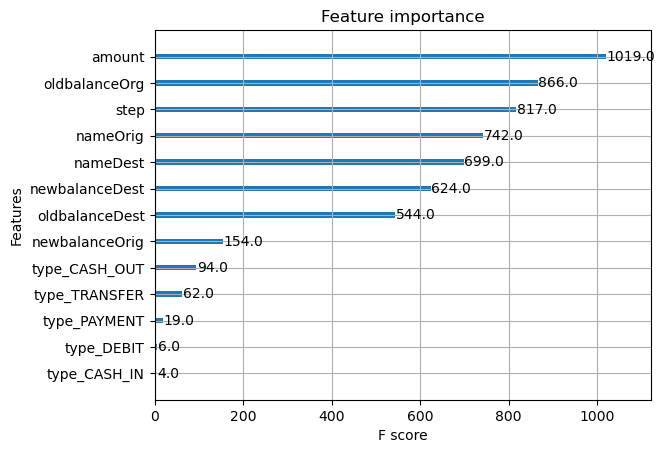

In [145]:
xgb.plot_importance(mk)

##
This helps in understanding the relative importance of different features in predicting the target,
which can guide feature selection and model refinement.

# Analysis of models
- Accuracy score of Logistic regression is 99%
- Accuracy score of LDA is 99%
- Accuracy score of DTC is 99%
- Since my data shows higher accuracy in all cases, I am considering LDA model for predicting this problem.